<a href="https://colab.research.google.com/github/RNSHDeepika7/Assignments/blob/main/multiple_linear_regression_assnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#ToyotaCorolla
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [76]:
import pandas as pd
df=pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


from matplotlib import pyplot as plt
df['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age_08_04'].plot(kind='hist', bins=20, title='Age_08_04')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Mfg_Month'].plot(kind='hist', bins=20, title='Mfg_Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Fuel_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Id', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price', y='Age_08_04', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age_08_04', y='Mfg_Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Mfg_Month', y='Mfg_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['Age_08_04']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('Age_08_04')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['Mfg_Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('Mfg_Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['Mfg_Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('Mfg_Year')

from matplotlib import pyplot as plt
df['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age_08_04'].plot(kind='line', figsize=(8, 4), title='Age_08_04')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Mfg_Month'].plot(kind='line', figsize=(8, 4), title='Mfg_Month')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fuel_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Id', y='Fuel_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fuel_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='Fuel_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fuel_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age_08_04', y='Fuel_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Fuel_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Mfg_Month', y='Fuel_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [35]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [77]:
Z=df.iloc[:,2:18]
Z.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [78]:
Z=Z.drop(Z.columns[[2,3,5,7,8,9,12]],axis=1)
Z

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [38]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:54:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [40]:
import numpy as np
print("MSE=",np.mean(model.resid**2))
model.resid.skew()

MSE= 1790935.608390293


-0.2189839924774982

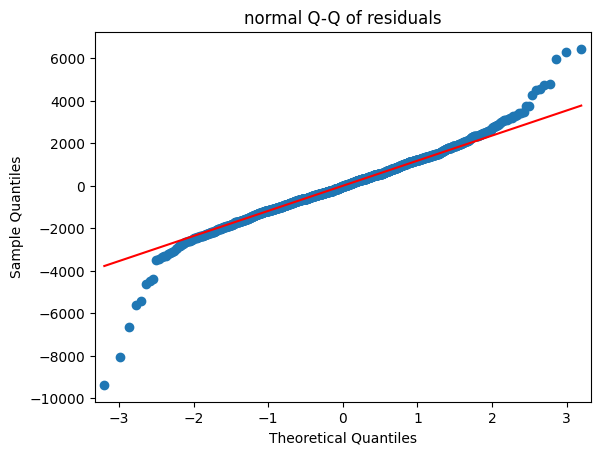

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q of residuals")
plt.show()

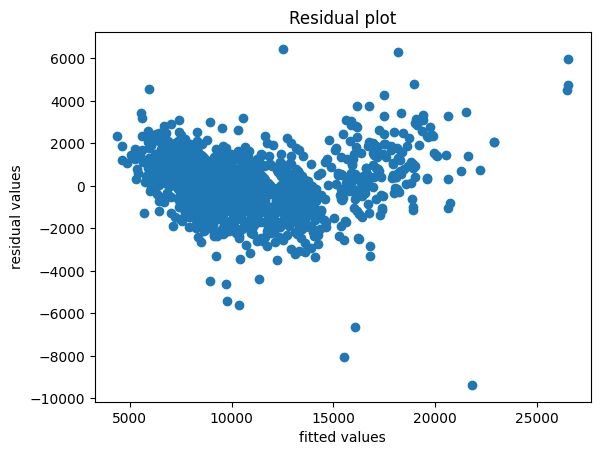

In [42]:
import matplotlib.pyplot as plt
plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("residual values")
plt.show()

In [43]:
model_influence=model.get_influence()
model_influence

In [44]:
(cooks,pvalue)=model_influence.cooks_distance
cooks=pd.DataFrame(cooks)
cooks[0].describe()

count    1.436000e+03
mean     5.756075e-02
std      2.098641e+00
min      7.279480e-12
25%      3.272575e-05
50%      1.409548e-04
75%      4.535454e-04
max      7.952011e+01
Name: 0, dtype: float64

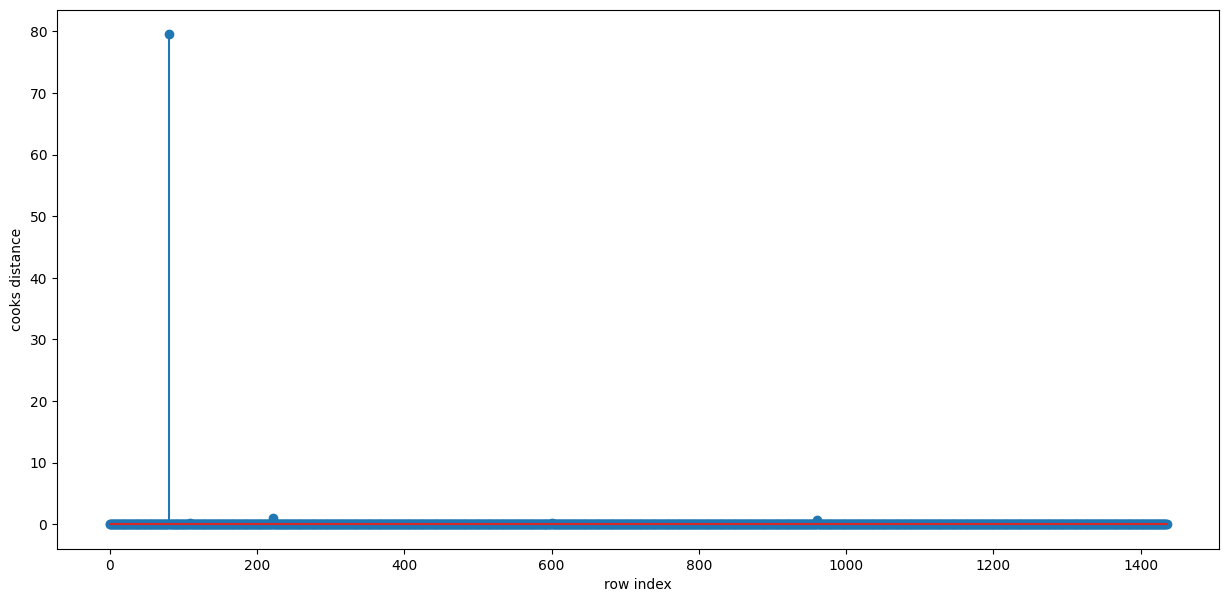

In [45]:
import matplotlib.pyplot as plt
fig=plt.subplots(figsize=(15,7))
plt.stem(np.arange(len(df)),np.round(cooks[0],3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [46]:
cooks[0][cooks[0]>0.5]

80     79.520106
221     1.021031
960     0.605000
Name: 0, dtype: float64

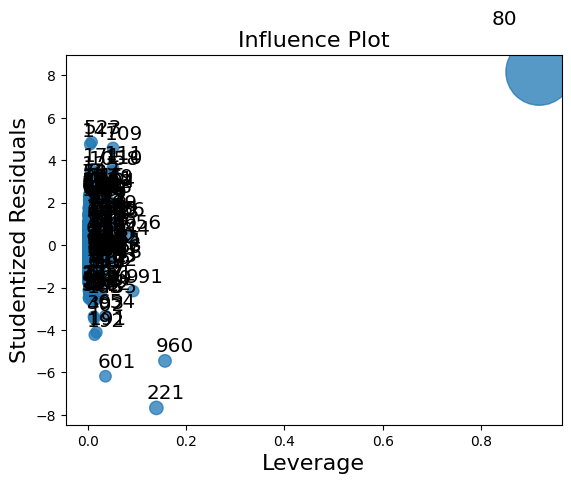

0.08147632311977715

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

In [48]:
cooks[0][cooks[0]>leverage_cutoff]

80     79.520106
109     0.124904
221     1.021031
601     0.155499
960     0.605000
Name: 0, dtype: float64

In [49]:
df.drop([80,109,221,601,960],inplace=True)
df.shape

(1431, 38)

In [50]:
Z=df.iloc[:,2:18]
Z.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [51]:
Z=Z.drop(Z.columns[[2,3,5,7,8,9,12]],axis=1)
Z

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Quarterly_Tax'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

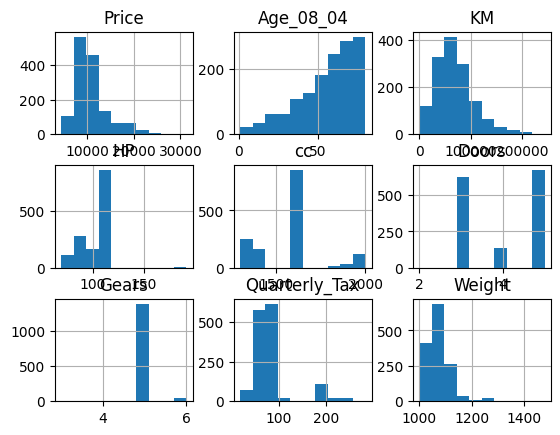

In [52]:
Z.hist()

<Axes: >

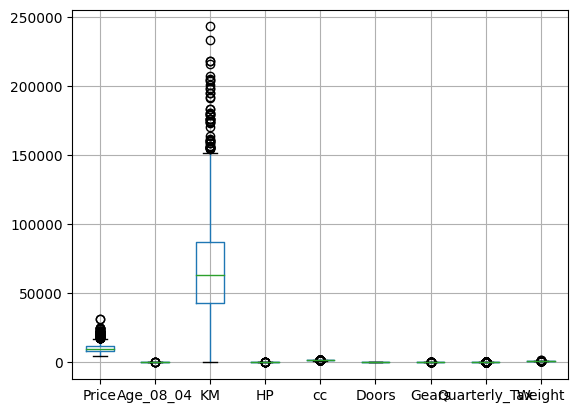

In [54]:
Z.boxplot()

In [55]:
Y=Z["Price"]
#X=Z[["Age_08_04"]]
#X=Z[["Age_08_04",'KM']]
#X=Z[["Age_08_04",'KM',"HP"]]
#X=Z[["Age_08_04",'KM',"HP","cc"]]
#X=Z[["Age_08_04",'KM',"HP","cc","Doors"]]
#X=Z[["Age_08_04",'KM',"HP","cc","Doors","Gears"]]
#X=Z[["Age_08_04",'KM',"HP","cc","Doors","Gears","Quarterly_Tax"]]
#X=Z[["Age_08_04",'KM',"HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
X=Z[["Age_08_04",'KM',"HP","cc","Quarterly_Tax","Weight"]]

In [58]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_predict = LR.predict(X)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y,Y_predict)
import pandas as pd
import numpy as np
RMSE=np.sqrt(mse)
print("root mean squared error=",RMSE.round(3))
r2=r2_score(Y,Y_predict)
print("R square=",r2.round(3))

root mean squared error= 1214.591
R square= 0.885


In [68]:
import numpy as np
import pandas as pd

# Create a table to store the results
table = pd.DataFrame(columns=["Variables", "RMSE", "R-squared"])

# Iterate over different sets of variables
for variables in [
  ["Age_08_04"],
  ["Age_08_04", "KM"],
  ["Age_08_04", "KM", "HP"],
  ["Age_08_04", "KM", "HP", "cc"],
  ["Age_08_04", "KM", "HP", "cc", "Doors"],
  ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears"],
  ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax"],
  ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"],["Age_08_04",'KM',"HP","cc","Quarterly_Tax","Weight"]
]:
  # Fit the model
  X = Z[variables]
  LR.fit(X, Y)

  # Predict the response
  Y_predict = LR.predict(X)

  # Calculate the RMSE and R-squared
  mse = mean_squared_error(Y, Y_predict)
  RMSE = np.sqrt(mse)
  r2 = r2_score(Y, Y_predict)

  # Add the results to the table
  table = table.append({
    "Variables": variables,
    "RMSE": RMSE,
    "R-squared": r2,
  }, ignore_index=True)

# Print the table
print(table)

                                           Variables         RMSE  R-squared
0                                        [Age_08_04]  1708.608764   0.771967
1                                    [Age_08_04, KM]  1622.928755   0.794264
2                                [Age_08_04, KM, HP]  1540.974492   0.814517
3                            [Age_08_04, KM, HP, cc]  1499.271971   0.824421
4                     [Age_08_04, KM, HP, cc, Doors]  1492.409037   0.826025
5              [Age_08_04, KM, HP, cc, Doors, Gears]  1485.479561   0.827636
6  [Age_08_04, KM, HP, cc, Doors, Gears, Quarterl...  1426.030421   0.841156
7  [Age_08_04, KM, HP, cc, Doors, Gears, Quarterl...  1203.594378   0.886845
8     [Age_08_04, KM, HP, cc, Quarterly_Tax, Weight]  1214.590516   0.884768


<ipython-input-68-81682a6abf47>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
<ipython-input-68-81682a6abf47>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
<ipython-input-68-81682a6abf47>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
<ipython-input-68-81682a6abf47>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
<ipython-input-68-81682a6abf47>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({
<ipython-input-68-81682a6abf47

In [69]:
import statsmodels.api as sm
import pandas as pd

# Add new columns to the table for adjusted R-squared, AIC, and BIC
table['Adjusted R-squared'] = ''
table['AIC'] = ''
table['BIC'] = ''

# Loop through each model and calculate the fit statistics
for i in range(len(table)):
    model = sm.OLS(Y, sm.add_constant(Z[table.loc[i, 'Variables']])).fit()
    table.loc[i, 'Adjusted R-squared'] = model.rsquared_adj.round(3)
    table.loc[i, 'AIC'] = model.aic.round(3)
    table.loc[i, 'BIC'] = model.bic.round(3)

# Print the updated table
print(table.to_string())


                                                      Variables         RMSE  R-squared Adjusted R-squared        AIC        BIC
0                                                   [Age_08_04]  1708.608764   0.771967              0.772  25368.112  25378.645
1                                               [Age_08_04, KM]  1622.928755   0.794264              0.794  25222.871  25238.669
2                                           [Age_08_04, KM, HP]  1540.974492   0.814517              0.814  25076.569  25097.634
3                                       [Age_08_04, KM, HP, cc]  1499.271971   0.824421              0.824  25000.049   25026.38
4                                [Age_08_04, KM, HP, cc, Doors]  1492.409037   0.826025              0.825  24988.918  25020.515
5                         [Age_08_04, KM, HP, cc, Doors, Gears]  1485.479561   0.827636              0.827  24977.599  25014.462
6          [Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax]  1426.030421   0.841156          

In [ ]:
#[Age_08_04, KM, HP, cc, Quarterly_Tax, Weight] is selected

In [70]:
pip install scikit-learn statsmodels


In [71]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit Huber regression model
huber_reg = HuberRegressor()
huber_reg.fit(X, Y)

# Print coefficients
print("Intercept:", huber_reg.intercept_)
print("Coefficient:", huber_reg.coef_)

Intercept: 1.3330751304947326
Coefficient: [44.82938055]


In [72]:
from sklearn.linear_model import RANSACRegressor

# Fit RANSAC regression model
ransac_reg = RANSACRegressor()
ransac_reg.fit(X, Y)

# Print coefficients
print("Intercept:", ransac_reg.estimator_.intercept_)
print("Coefficient:", ransac_reg.estimator_.coef_)

Intercept: 0.6384208826040156
Coefficient: [44.07500518]


In [79]:
#Lasso regression
Y=Z["Price"]
X=Z.iloc[:,1:9]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [82]:
from sklearn.linear_model import Lasso
Lass=Lasso(alpha=100)
Lass.fit(X,Y)
Lass.coef_
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(Lass.coef_)],axis=1)

,0,0
0,Age_08_04,-121.320431
1,KM,-0.020703
2,HP,33.030271
3,cc,-0.119957
4,Doors,-0.000000
5,Gears,0.000000
6,Quarterly_Tax,4.032997
7,Weight,16.937449


In [85]:
Y=Z["Price"]
X_new=X.drop(X.columns[[4,5]],axis=1)
list(X_new)

['Age_08_04', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight']

In [86]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.30,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 1326.02
cross validation test accuracy score= 1662.04


In [87]:
#Ridge regression
Y=Z["Price"]
X=Z.iloc[:,1:9]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [95]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=10000000)
RR.fit(X,Y)
RR.coef_
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(RR.coef_)],axis=1)

,0,0
0,Age_08_04,-4.587059
1,KM,-0.055973
2,HP,0.880537
3,cc,1.004035
4,Doors,0.051642
5,Gears,0.006538
6,Quarterly_Tax,4.384884
7,Weight,9.462111


In [96]:
Y=Z["Price"]
X_new=X.drop(X.columns[[4,5]],axis=1)
list(X_new)

['Age_08_04', 'KM', 'HP', 'cc', 'Quarterly_Tax', 'Weight']

In [97]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.30,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 1326.02
cross validation test accuracy score= 1662.04


In [1]:
#50_Startups

from google.colab import files
uploaded=files.upload()
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df

Saving 50_Startups.csv to 50_Startups.csv


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


from matplotlib import pyplot as plt
df['R&D Spend'].plot(kind='hist', bins=20, title='R&D Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Administration'].plot(kind='hist', bins=20, title='Administration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Marketing Spend'].plot(kind='hist', bins=20, title='Marketing Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='R&D Spend', y='Administration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Administration', y='Marketing Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Marketing Spend', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['R&D Spend'].plot(kind='line', figsize=(8, 4), title='R&D Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Administration'].plot(kind='line', figsize=(8, 4), title='Administration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Marketing Spend'].plot(kind='line', figsize=(8, 4), title='Marketing Spend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='R&D Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Administration', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Marketing Spend', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [2]:
df.shape

(50, 5)

In [3]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["State"] = LE.fit_transform(df["State"])
df["State"]

0     2
1     0
2     1
3     2
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    0
12    1
13    0
14    1
15    2
16    0
17    2
18    1
19    2
20    0
21    2
22    1
23    1
24    2
25    0
26    1
27    2
28    1
29    2
30    1
31    2
32    0
33    1
34    0
35    2
36    1
37    0
38    2
39    0
40    0
41    1
42    0
43    2
44    0
45    2
46    1
47    0
48    2
49    0
Name: State, dtype: int64

In [4]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


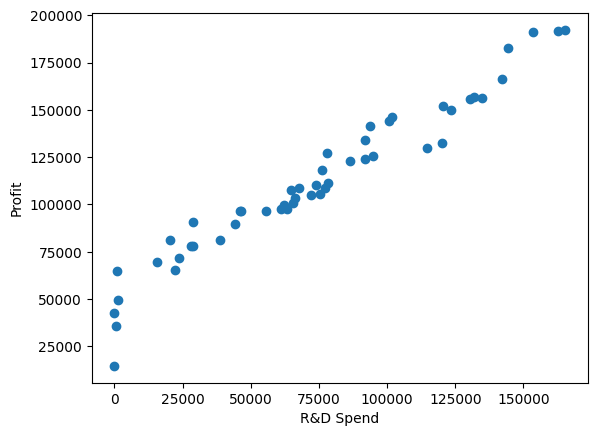

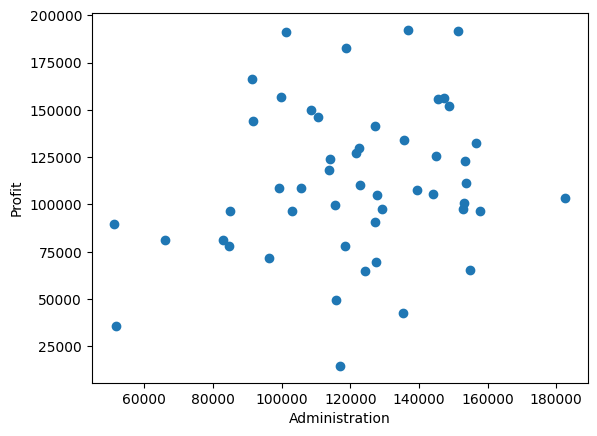

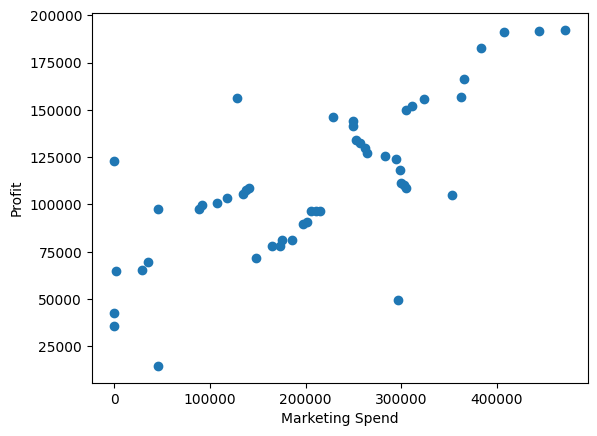

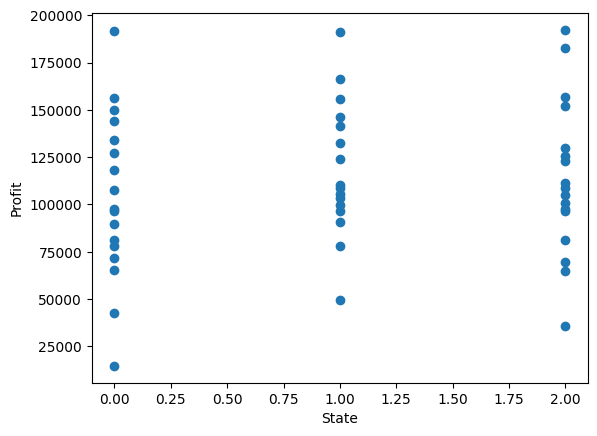

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["R&D Spend"],df["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()
plt.scatter(df["Administration"],df["Profit"])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()
plt.scatter(df["Marketing Spend"],df["Profit"])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()
plt.scatter(df["State"],df["Profit"])
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [ ]:
Y=df["Profit"]
#X=df[["R&D Spend"]]
#X=df[["R&D Spend","Administration"]]
X=df[["R&D Spend","Administration","Marketing Spend"]]
#X=df[["R&D Spend","Administration","Marketing Spend","State"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_predict = LR.predict(X)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y,Y_predict)
import pandas as pd
import numpy as np
RMSE=np.sqrt(mse)
print("root mean squared error=",RMSE.round(3))
r2=r2_score(Y,Y_predict)
print("R square=",r2.round(3))

root mean squared error= 8855.344
R square= 0.951


In [ ]:
import pandas as pd
table = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "RMSE": [9226.101, 9115.198, 8855.344,8855.326],
    "R-squared": [0.947, 0.948, 0.951, 0.951]
})
print(table.to_string())

     Model      RMSE  R-squared
0  Model 1  9226.101      0.947
1  Model 2  9115.198      0.948
2  Model 3  8855.344      0.951
3  Model 4  8855.326      0.951


In [ ]:
# Add new columns to the table for adjusted R-squared, AIC, and BIC
table['Adjusted R-squared'] = ''
table['AIC'] = ''
table['BIC'] = ''

# Loop through each model and calculate the fit statistics
for i in range(len(table)):
    model = sm.OLS(Y, sm.add_constant(X.iloc[:, :i+1])).fit()
    table.loc[i, 'Adjusted R-squared'] = model.rsquared_adj.round(3)
    table.loc[i, 'AIC'] = model.aic.round(3)
    table.loc[i, 'BIC'] = model.bic.round(3)

# Print the updated table
print(table.to_string())

     Model      RMSE  R-squared Adjusted R-squared       AIC       BIC
0  Model 1  9226.101      0.947              0.945  1058.873  1062.697
1  Model 2  9115.198      0.948              0.946  1059.664    1065.4
2  Model 3  8855.344      0.951              0.948  1058.771   1066.42
3  Model 4  8855.326      0.951              0.948  1058.771   1066.42


In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit Huber regression model
huber_reg = HuberRegressor()
huber_reg.fit(X, Y)

# Print coefficients
print("Intercept:", huber_reg.intercept_)
print("Coefficient:", huber_reg.coef_)

Intercept: 1.3330751304947326
Coefficient: [44.82938055]


In [ ]:
from sklearn.linear_model import RANSACRegressor

# Fit RANSAC regression model
ransac_reg = RANSACRegressor()
ransac_reg.fit(X, Y)

# Print coefficients
print("Intercept:", ransac_reg.estimator_.intercept_)
print("Coefficient:", ransac_reg.estimator_.coef_)

Intercept: 1.3947222083087532
Coefficient: [44.29985986]


In [8]:
#Lasso regression

Y=df["Profit"]
X=df.iloc[:,0:4]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [13]:
from sklearn.linear_model import Lasso
Lass=Lasso(alpha=100)
Lass.fit(X,Y)
Lass.coef_
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(Lass.coef_)],axis=1)

,0,0
0,R&D Spend,0.805715
1,Administration,-0.026816
2,Marketing Spend,0.027228
3,State,-0.000000


In [14]:
Y=df["Profit"]
X_new=X.drop(X.columns[[3]],axis=1)
list(X_new)

['R&D Spend', 'Administration', 'Marketing Spend']

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.30,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 8757.36
cross validation test accuracy score= 9224.67


In [18]:
#Ridge regression

Y=df["Profit"]
X=df.iloc[:,0:4]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [30]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=1000)
RR.fit(X,Y)
RR.coef_
pd.concat([pd.DataFrame(list(X)),pd.DataFrame(RR.coef_)],axis=1)

,0,0
0,R&D Spend,0.805716
1,Administration,-0.026816
2,Marketing Spend,0.027228
3,State,-0.726023


In [31]:
Y=df["Profit"]
X_new=X.drop(X.columns[[3]],axis=1)
list(X_new)

['R&D Spend', 'Administration', 'Marketing Spend']

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.30,random_state=i)
    LR.fit(X_train,Y_train)
    Y_pred_train=LR.predict(X_train)
    Y_pred_test=LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 8757.36
cross validation test accuracy score= 9224.67


In [ ]:
#model 3 is selected

In [ ]:
#Decision tree
Y=df["Profit"]
X=df.iloc[:,0:4]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
SS_X=pd.DataFrame(SS_X)
SS_X.columns=list(X)
SS_X.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.016411,0.560753,2.153943,1.212678
1,1.955860,1.082807,1.923600,-1.212678
2,1.754364,-0.728257,1.626528,0.000000
3,1.554784,-0.096365,1.422210,1.212678
4,1.504937,-1.079919,1.281528,0.000000


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train=dt_model.predict(X_train)
    Y_pred_test=dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 0.0
cross validation test accuracy score= 13596.79


In [ ]:
#Bagging regressor
import numpy as np
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=2),n_estimators=100,max_features=0.7,max_samples=0.6,random_state=42,)
bag_reg.fit(X_train, Y_train)
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    bag_reg.fit(X_train,Y_train)
    Y_pred_train=bag_reg.predict(X_train)
    Y_pred_test=bag_reg.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 15818.94
cross validation test accuracy score= 19926.15


In [ ]:
#support vector machine
import numpy as np
from sklearn.svm import SVR
svr = SVR(C=1,kernel='linear')
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    svr.fit(X_train,Y_train)
    Y_pred_train=svr.predict(X_train)
    Y_pred_test=svr.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 40199.24
cross validation test accuracy score= 39599.6


In [ ]:
import numpy as np
from sklearn.svm import SVR
svr = SVR(C=1,kernel='poly', degree=1)
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    svr.fit(X_train,Y_train)
    Y_pred_train=svr.predict(X_train)
    Y_pred_test=svr.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 40232.89
cross validation test accuracy score= 39631.55


In [ ]:
import numpy as np
from sklearn.svm import SVR
svr = SVR(C=1,kernel='rbf')
from sklearn.model_selection import train_test_split
training_error=[]
test_error=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    svr.fit(X_train,Y_train)
    Y_pred_train=svr.predict(X_train)
    Y_pred_test=svr.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))

print("cross validation training accuracy score=",np.mean(training_error).round(2))
print("cross validation test accuracy score=",np.mean(test_error).round(2))

cross validation training accuracy score= 40241.15
cross validation test accuracy score= 39640.0
